In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

In [3]:
mydb = mysql.connector.connect(host="10.50.202.242",
                               user="user01",
                               password="theteam246",
                               database="user01"
                              )

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM sensorrecords_trial")
myresult = mycursor.fetchall()

In [4]:
columns=["index", "device1", "distance1", "device2", "distance2", "date", "time"]
data = pd.DataFrame(myresult, columns=columns).drop(["index"], axis=1)

In [12]:
data.tail(50)

,device1,distance1,device2,distance2,date,time,detected_dist1,detected_dist2,counter
50,1,10.85,2,11.12,2020-11-17,0 days 11:09:38,False,False,0
51,1,10.79,2,11.12,2020-11-17,0 days 11:09:38,False,False,0
52,1,10.85,2,11.05,2020-11-17,0 days 11:09:38,False,False,0
53,1,10.79,2,11.05,2020-11-17,0 days 11:09:38,False,False,0
54,1,10.79,2,11.18,2020-11-17,0 days 11:09:38,False,False,0
55,1,10.79,2,10.99,2020-11-17,0 days 11:09:38,False,False,0
56,1,10.79,2,11.12,2020-11-17,0 days 11:09:38,False,False,0
57,1,10.79,2,11.05,2020-11-17,0 days 11:09:39,False,False,0
58,1,10.85,2,11.05,2020-11-17,0 days 11:09:39,False,False,0
59,1,10.85,2,11.05,2020-11-17,0 days 11:09:39,False,False,0


In [6]:
def counter(data, threshold=5, period=4):
    """
    data: dataframe imported from databse
    threshold: change in distance to be considered
    period: time period we should evaluate for each movement. 6 means calculation checks previous 6 rows
    """
    data["detected_dist1"]=""
    data["detected_dist2"]=""
    data["counter"]=0
    
    for i in range(len(data)):
        previous=max(0, i-period)
        if data["distance1"].iloc[i]<threshold: #motion detected
            data["detected_dist1"].iloc[i]=True
            if data["detected_dist2"].iloc[previous:i].any(): #motion previously detected by device2
                data["counter"].iloc[i]=data["counter"].iloc[i-1]-1 #someone is leaving
            else:
                data["counter"].iloc[i]=data["counter"].iloc[i-1]
        else:
            data["detected_dist1"].iloc[i]=False
            data["counter"].iloc[i]=data["counter"].iloc[i-1]

        if data["distance2"].iloc[i]<threshold: #motion detected
            data["detected_dist2"].iloc[i]=True
            if data["detected_dist1"].iloc[previous:i].any(): #motion previously detected by device2
                data["counter"].iloc[i]=data["counter"].iloc[i-1]+1 #someone is entering
            else:
                data["counter"].iloc[i]=data["counter"].iloc[i-1]
        else:
            data["detected_dist2"].iloc[i]=False
    
    return data

In [15]:
counter(data, threshold=7, period=4)

C:\Users\eda_c\Anaconda3_n\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,device1,distance1,device2,distance2,date,time,detected_dist1,detected_dist2,counter
0,1,10.85,2,11.05,2020-11-17,0 days 11:09:32,False,False,0
1,1,10.85,2,10.99,2020-11-17,0 days 11:09:32,False,False,0
2,1,10.85,2,11.05,2020-11-17,0 days 11:09:32,False,False,0
3,1,10.85,2,11.05,2020-11-17,0 days 11:09:32,False,False,0
4,1,10.79,2,11.05,2020-11-17,0 days 11:09:33,False,False,0
...,...,...,...,...,...,...,...,...,...
95,1,10.85,2,7.21,2020-11-17,0 days 11:09:56,False,False,-2
96,1,3.30,2,11.12,2020-11-17,0 days 11:09:57,True,False,-2
97,1,10.79,2,11.12,2020-11-17,0 days 11:09:58,False,False,-2
98,1,10.85,2,11.05,2020-11-17,0 days 11:09:58,False,False,-2


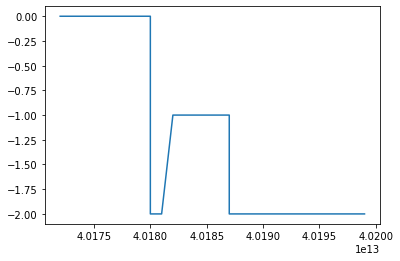

In [16]:
fig=plt.plot(data.time, data.counter)
fig.savefig("plot.png")